## Introduction to Hypothesis Testing

In this notebook, you'll become familiar with **Hypothesis Testing**, starting with a theoretical introduction, then a practical step-by-step example, an exercise for you to complete, and a short quiz.

### What is hypothesis testing?

Hypothesis testing is a cornerstone of statistical inference, enabling researchers to make claims about population parameters based on sample data. It is a robust method of understanding something about the general population bassed on a sample of data we have collected. For example, you might come up with the hypothesis that more than 50% of people in your city like pineapple on pizza. In order to prove or disprove your hypothesis, you would take a sample of people with their pizza preferences, and see if the evidence you get allows you to state that indeed, at least 50% of people in your city like pineapple on pizza!
<br> Today, we'll walk through a one-sample t-test example and then guide you to conduct your own analysis.

![](https://github.com/IranelGV/Ironhack_IDGV/blob/main/Hypothesis_Testing/6.png?raw=True)

### Simplified Example

You’re an orchard owner. Based on past harvests, your apples weighed 180 grams on average. You changed the fertilizer, and want to check if it had any effect on the weight of your apples.

To test, you take a sample of 50 apples, weigh them, and find that:

* The average weight is 175 grams
* The standard deviation is 20 grams

You wonder: Is the difference between the previous average weight (180g) and the measured average weight for the current sample (175g) just random, or is the weight now actually less than 180 grams?

#### Goal
Test whether the true average weight of apples is less than 180 grams, based on your sample, to determine if you should switch back to the previous fertilizer.

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

# Sample information
sample_size = 50
sample_mean = 175
sample_std_dev = 20
previous_mean = 180  # what you expected

# Standard error
sem = sample_std_dev / math.sqrt(sample_size)

# Calculate the test statistic (how far the sample mean for the current harvest is from the mean of the previous harvest)
t_statistic = (sample_mean - previous_mean) / sem

# Get the p-value (how likely it is that I would have the current sample if the mean of the population for the current harvest was 180)
p_value = stats.t.cdf(t_statistic, df=sample_size - 1)  # One-tailed test

# Decision threshold
alpha = 0.05  # 5% cutoff - if we conclude that the weight of apples were not affected, we assume a 5% chance that we are wrong

# Output the result
print(f"Test statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Conclusion: The apples are likely weighing LESS than 180g.")
else:
    print("Conclusion: There's not enough evidence to say the apples weigh less than 180g.")

Test statistic: -1.77
P-value: 0.0417
Conclusion: The apples are likely weighing LESS than 180g.


In [ ]:
# OR with a python function

# generate a random sample considering the new mean according to your sample
random_sample = np.random.normal(loc=sample_mean, scale=sample_std_dev, size=sample_size) # p_values will fluctuate depending on the sample generated

# calculate the p_value, comparing the current sample with the previous mean
t_stat, p_value = stats.ttest_1samp(random_sample, popmean=previous_mean, alternative='less')
p_value

np.float64(0.022499878268603817)

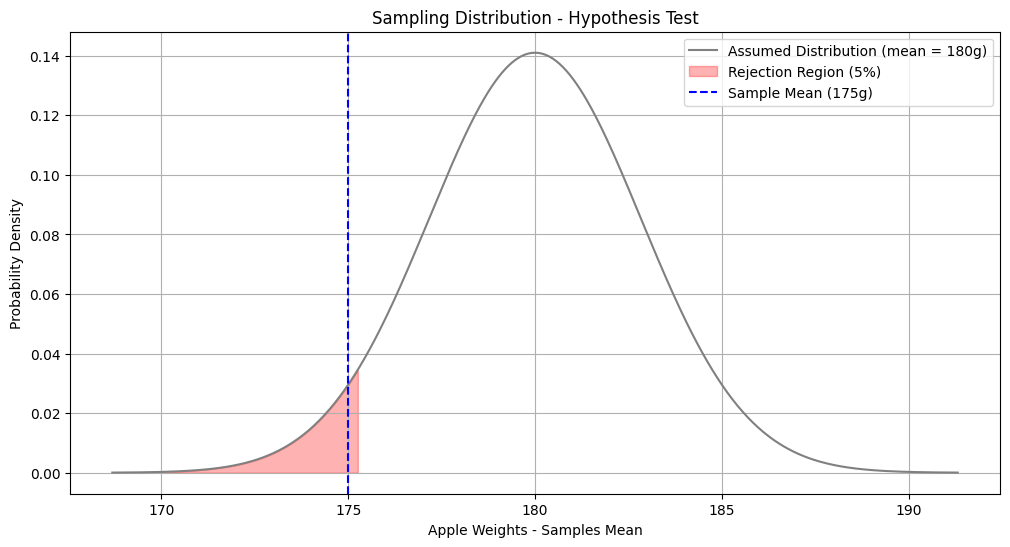

In [ ]:
# Visualization

# T distribution parameters
df = sample_size - 1
t_crit = stats.t.ppf(0.95, df)  # one-tailed, 5% level

# Generate x values for plot
x = np.linspace(previous_mean - 4*sem, previous_mean + 4*sem, 500)
y = stats.norm.pdf(x, loc=previous_mean, scale=sem)

# Start plotting
plt.figure(figsize=(12, 6))

# Plot the null distribution
plt.plot(x, y, label='Assumed Distribution (mean = 180g)', color='gray')

# Shade rejection region (left tail, 5% level)
rejection_x = np.linspace(previous_mean - 4*sem, previous_mean - t_crit * sem, 200)
rejection_y = stats.norm.pdf(rejection_x, loc=previous_mean, scale=sem)
plt.fill_between(rejection_x, rejection_y, color='red', alpha=0.3, label='Rejection Region (5%)')

# Plot the sample mean
plt.axvline(sample_mean, color='blue', linestyle='--', label='Sample Mean (175g)')


# Labels and legend
plt.title('Sampling Distribution - Hypothesis Test')
plt.xlabel('Apple Weights - Samples Mean')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

#### How to Read This Plot:
The gray curve is what we’d expect if apples still weighed 180g.

The red shaded area is the "rejection region" — if your sample mean lands here, you'd reject the idea that apples still weigh 180g.

The blue dashed line shows your actual sample mean (175g) — which is in the red region, meaning you reject the average from the previous harvest.

#### Conclusion

Oversimplifying: Hypothesis testing is about verifying how likely it is that the sample you have was improbable, or if it's a sample that actually represents "most samples".



### Step-by-Step Example: One-Sample T-Test on a New Beverage's Caffeine Content

Suppose a beverage company claims that their new coffee drink contains exactly 95 mg of caffeine per serving. Skeptical of this claim, you decide to test whether the true mean caffeine content is different.
Your resources are limited and you can't possibly try all of this company's coffee drinks. You will go with a large enough sample (larger than 30, if you remember the Central Limit Theorem) and see if you have strong enough evidence to conclude that this new drink **does not** contain 95 mg of caffeine.
  
  
  

### Steps:

1. **State the Hypotheses**:

In this step, we define H0 and H1, two mutually exclusive hypotheses, which are called respectively the null and alternative hypothesis. By definition, the null hypothesis (H0) tends to be the claim that we want to disprove, or in this case, the fact that the new coffee drink contains exactly 95 mg of caffeine.

   - Null hypothesis ($H_0$): $ \mu = 95 $ mg (The drink contains 95 mg of caffeine.)
   - Alternative hypothesis ($H_1$): $ \mu \neq 95 $ mg (The drink does not contain 95 mg of caffeine.)
   
2. **Significance Level**:
   - Choose a significance level ($\alpha$) of 0.05. This significance level of 0.05 is generally used by default.

3. **Collect Data**:
   - After selecting 40 random servings of the beverage and measuring their caffeine content, you find a sample mean ($ \bar{x} $) of 98 mg and a sample standard deviation ($ s $) of 4 mg.
   
   The question now is: *Is this evidence strong enough for us to conclude that this drink does not have the stated 95 mg of caffeine?*
  To answer it, we perform a T-test!
  
4. **Perform a One-Sample T-Test**:
   - Determine if the sample mean significantly differs from the population mean claimed by the company.

The result of our T-Test will yield us a p-value.

If the p-value is less than or equal to $\alpha$ (p-value $\leq \alpha$): There is sufficient evidence to reject the null hypothesis. This outcome suggests that the observed data are unlikely to have occurred by random chance alone under the assumption that the null hypothesis is true. It indicates a statistically significant result, supporting the alternative hypothesis ($H_1$). We **can say** that the beverage does not contain the stated quantity of caffeine.

If the p-value is greater than $\alpha$ (p-value $> \alpha$): There is insufficient evidence to reject the null hypothesis. This outcome suggests that the observed data are consistent with the null hypothesis, or at least not sufficiently inconsistent to warrant rejection. It does not prove the null hypothesis true but indicates that the data do not provide strong evidence against it. We **can not say** that the beverage does not contain the stated quantity of caffeine.
   
#### Breakdown of Key Statistical Concepts

##### Significance Level ($\alpha$)

- The significance level is the threshold for determining statistical significance. It's the probability threshold below which the null hypothesis is rejected.
  Think of $\alpha$ as the risk level you're willing to accept for rejecting the null hypothesis when it is actually true (a type I error). Commonly, $\alpha$ is set at 0.05.
  If a car alarm is too sensitive, it might go off unnecessarily. Similarly, a very low $\alpha$ (high sensitivity) increases the chance of falsely detecting an effect (false alarms).

##### T-Statistic

- A value that measures the distance of the sample mean from the null hypothesis mean, in units of standard error. It's used in t-tests to determine if the observed data differ significantly from what the null hypothesis would predict.
  The t-statistic quantifies how extreme the observed result is. A high absolute value indicates a result that's far from the expected under the null hypothesis.
  Comparing the average height of basketball players to average people is like the t-statistic. A significant difference (a high t-value) is like noticing someone much taller than average in a crowd, suggesting they might be a basketball player.

##### P-Value

- The probability of observing results as extreme as, or more extreme than, the results actually observed during the test, assuming the null hypothesis is true.
  A small p-value suggests that the observed data are unlikely under the null hypothesis. This leads to either rejecting the null hypothesis

##### One sample T-test

- The one sample t test is a statistical hypothesis test used to determine whether the mean calculated from sample data collected from a single group is different from a given value.

![](https://github.com/IranelGV/Ironhack_IDGV/blob/main/Hypothesis_Testing/7.png?raw=True)

**Here is a step by step implementation in Python:**

In [1]:
# Step-by-Step Example Code:
from scipy.stats import ttest_1samp
import numpy as np

# We generate fake data for a sample of 40 beverages
sample_caffeine_content = np.array([96, 97, 95, 94, 92, 99, 100, 98, 97, 95, 99, 96, 98, 100, 93, 95, 97, 99, 100, 98, 96, 94, 95, 98, 97, 99, 100, 96, 98, 97, 95, 94, 93, 99, 97, 98, 96, 95, 96, 98])

# Here is the population mean claimed by the company
pop_mean = 95  # mg of caffeine

# We perform a one-sample t-test
t_stat, p_value = ttest_1samp(sample_caffeine_content, pop_mean)

print(f"T-statistic: {round(t_stat, 3)}")
print(f"P-value: {round(p_value, 3)}")

# Decision (We either reject or fail to reject the null hypothesis)
if p_value < 0.05:
    print("Reject the null hypothesis: There is enough evidence to suggest the caffeine content is not 95 mg.")
else:
    print("Do not reject the null hypothesis: There is not enough evidence to suggest the caffeine content is not 95 mg.")


T-statistic: 5.165
P-value: 0.0
Reject the null hypothesis: There is enough evidence to suggest the caffeine content is not 95 mg.


In [10]:
sample = [10,10,10,10,1]
sample_mean = np.mean(sample)
print(sample_mean)
expected_mean = 10
t, p = ttest_1samp(sample, expected_mean)
print(t,p)

8.2
-1.0000000000000004 0.3739009663000587


**In summary, given that we obtained a p-value smaller than our significance level, we interpret this as:
<br> The probability of obtaining the data we got, assuming that the null hypothesis (H0) is true, is approximately 0%.
Therefore, we have strong enough evidence to reject the null hypothesis, or in this case, we reject the claim that the beverage has a caffeine content of 95 mg.**

#### Your Turn: Evaluate a New Sleep Aid

A pharmaceutical company has developed a sleep aid, claiming it increases nightly sleep duration by an average of 2 hours. You've collected data from 30 volunteers using the sleep aid and are ready to test this claim.

1. **State the Hypotheses**:
   - Null hypothesis ($H_0$): $ \mu = 2 $ hours (The sleep aid increases sleep by 2 hours.)
   - Alternative hypothesis ($H_1$): $ \mu \neq 2 $ hours (The sleep aid does not increase sleep by 2 hours.)

2. **Collect Your Data**: Fill in the sample data from your study.

3. **Perform a One-Sample T-Test**: Substitute the provided Python code's variables with your own data.

4. **Interpret Your Results**: Based on the t-test, decide on the validity of the company's claim about the sleep aid's effectiveness.



**In the below cell, you must fill the missing values before you can successfully execute it and perform your own hypothesis test**

In [ ]:
import numpy as np
from scipy.stats import ttest_1samp

# We generate fake data of increased sleep duration for a sample of 30 volunteers
increased_sleep_hours = np.array([2.5, 1.8, 2.4, 3.1, 2.2, 1.9, 2.8, 2.0, 3.0, 2.3,
                                  2.1, 2.5, 2.3, 2.7, 2.4, 1.8, 2.0, 2.9, 2.1, 2.6,
                                  1.7, 2.5, 2.9, 2.2, 2.0, 2.7, 2.4, 2.3, 2.1, 2.5])

# Here is the population mean claimed by the company
claimed_mean_increase = 2   # fill in the claimed number of hours of sleep increase

# We perform a one-sample t-test
t_stat, p_value = ttest_1samp(increased_sleep_hours, claimed_mean_increase)

print(f"T-statistic: {round(t_stat, 3)}")
print(f"P-value: {round(p_value, 3)}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("") # type in what should be printed if the the p-value is smaller than the significance level
else:
    print("") # type in what should be printed if the the p-value is bigger or equal to the significance level


T-statistic: 5.238
P-value: 0.0



##### Questions

**1) Which is a correct interpretation of a p-value of 0.001?**
- A) There is a 0.1% probability that the null hypothesis is true.
- B) There is a 99.9% probability that the alternative hypothesis is true.
- C) There is a 0.1% chance of observing the data, or something more extreme, if the null hypothesis is true.
- D) 0.1% of the data support the null hypothesis.

Your answer:

In [ ]:
### Insert your answer here....

**2) In a one-sample t-test, what are you comparing?**
- A) The means of two independent samples.
- B) The mean of a sample to a known population mean.
- C) The variance of a sample to the population variance.
- D) Two related samples.

Your answer:

In [ ]:
### Insert your answer here....

**3) Which scenario is most appropriate for a one-sample hypothesis test?**
- A) Determining if there's a difference in mean blood pressure between two groups.
- B) Comparing the mean height of men to a standard value.
- C) Testing if there's a relationship between exercise and sleep quality.
- D) Comparing the variance of temperatures on two different days.

Your answer:

In [ ]:
### Insert your answer here....

### Titatic Data - One Sample T-test

In [ ]:
#Load the data

df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

**Let's check if 1st class ticket prices, traditionally thought to be $65, actually align with historical data through statistical testing.**

First we are breaking it down step by step

##### Set Hypothesis

In [ ]:
#Set the hypothesis

#H0: mu 1st class_prices = 65
#H1: mu 1st class_prices!= 65

##### Choose significance level

In [ ]:
alpha = 0.05

##### Collect data

In [ ]:
first_class = df[df["Pclass"]==1]["Fare"]

##### Compute Test Statistic

In [ ]:
#In order to calculate test statistic we need

#sample mean
mean = first_class.mean()

#standard deviation of sample
s = first_class.std(ddof=1)

#sample size
n = len(first_class)

#hypothesized population mean
mu = 65

stat = (mean - mu)/(s/np.sqrt(n))
stat

3.591655076885525

##### Determine p_value

- In two-tailed test we can obtain the p_value using --> st.t.sf(abs(stat), n-1)*2

- In one-tailed test we can obtain the p_value using --> st.t.sf(abs(stat), n-1)

In [ ]:
p_value = st.t.sf(abs(stat), n-1)*2
p_value

0.00040720407722134215

##### Decision-making

In [ ]:
if p_value > alpha:
    print("We are not able to reject the null hypothesis")
else:
    print("We reject the null hypotesis")

We reject the null hypotesis


In this case because the p_value is lower our significance level, we can indeed reject the null hypothesis that claims 1st class tickets costs on average 60$.

**Python way**

In [ ]:
st.ttest_1samp(first_class, 65)

TtestResult(statistic=3.591655076885525, pvalue=0.00040720407722134215, df=215)

**What if we believe that prices are more expensive than 65$ ?**

In [ ]:
#Set hypothesis

#H0: mu 1st class_prices <= 65
#H1: mu 1st class_prices > 65

#with alpha = 0.05

In [ ]:
### Insert your answer here....

In [ ]:
st.ttest_1samp(first_class, 65, alternative = "greater")

TtestResult(statistic=3.591655076885525, pvalue=0.00020360203861067108, df=215)

We also reject the null hypothesis that claimed 1st class prices on average equal or lower than 65.

We can say we obtained enough evidence to reject the null hypothesis